# Unsupervised Learning

## Principle Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk 
from tools import*
%matplotlib inline

In [4]:
azdias=pd.read_csv("azdias_clean.csv")
#customers=pd.read_csv("customers_clean.csv")

In [5]:
azdias_id=azdias.LNR.astype(int)

In [6]:
azdias.drop(columns="LNR",inplace=True)

Before doing any principle component analysis , we should only include the numeric / numeric-categorical data in the data sets, not the string ones.

In [7]:
%%time
string_cols=string_columns(azdias)

CPU times: user 37.8 s, sys: 3.51 ms, total: 37.8 s
Wall time: 37.8 s


In [8]:
wanted_cols=list(set(azdias.columns)-set(string_cols))

In [9]:
save_list(wanted_cols,"non_string_cols")

In [10]:
string_cols

['CAMEO_DEU_2015', 'OST_WEST_KZ']

Let's check those string columns

- And for `CAMEO_DEU_2015` and `OST_WEST_KZ`encode them. 

In [11]:
save_list(string_cols,"one_hot_cols")

In [12]:
azdias=pd.concat([azdias[wanted_cols],pd.get_dummies(azdias[["CAMEO_DEU_2015","OST_WEST_KZ"]])],axis=1)
azdias 

,D19_DIGIT_SERV,KBA13_HALTER_60,KBA13_SEG_GELAENDEWAGEN,D19_GESAMT_OFFLINE_DATUM,KBA13_KRSAQUOT,KBA13_GBZ,KBA05_KRSHERST2,WOHNDAUER_2008,D19_KONSUMTYP,KBA05_ANTG4,...,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W
0,0.0,3.0,3.0,10.0,3.0,3.0,3.0,8.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,3.0,2.0,10.0,2.0,4.0,4.0,9.0,9.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,3.0,5.0,10.0,3.0,4.0,2.0,9.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,4.0,3.0,10.0,3.0,4.0,2.0,9.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,2.0,3.0,6.0,3.0,3.0,3.0,9.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,0.0,4.0,3.0,8.0,3.0,3.0,3.0,4.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
891217,0.0,2.0,2.0,10.0,2.0,3.0,4.0,9.0,9.0,1.0,...,0,0,0,0,0,0,1,0,0,1
891218,0.0,2.0,3.0,8.0,4.0,4.0,3.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
891219,0.0,5.0,1.0,10.0,3.0,1.0,2.0,9.0,9.0,0.0,...,0,0,0,0,0,0,1,0,0,1


Let's scale our data 

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [14]:
azdias=pd.DataFrame(data=scaler.fit_transform(azdias),columns=azdias.columns) #scaled 

In [15]:
azdias.to_csv("Azdias_scaled.csv",index=False)

As we saw above we removed the LNR column which is the ID because it won't be needed in the analysis 

In [16]:
azdias_id.to_csv("azdias_id.csv",index=False)

## **Now restart kernel and run from the next cell (for memory issues)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk 
from tools import*

In [11]:
azdias=pd.read_csv("Azdias_scaled.csv")

In [3]:
from sklearn.decomposition import PCA 

Let's try out how many features we would have if we wanted 95% of variance explained by out principle components

In [4]:
pca_95=PCA(n_components=0.95)

In [5]:
pca_95.fit(azdias.values)

PCA(n_components=0.95)

In [6]:
print("Number of original features = {}".format(len(azdias.columns)))
print("Number of priniciple components that explains 95% of variance in our data set = {}".format(pca_95.n_components_))

Number of original features = 399
Number of priniciple components that explains 95% of variance in our data set = 233


As we can see above we have 233 principle component out of 399 feature that explains 95% of the variance of our data set.

In [7]:
v=pca_95.components_ #weights of each column of our original data set for each component
s_ratio=pca_95.explained_variance_ratio_ #ratio of explained variance for each principle component 

In [8]:
azdias_pca=pca_95.transform(azdias.values)

In [9]:
pca_95.n_components_

233

In [10]:
column_names=["c_{}".format(x) for x in range(1,234)]

In [11]:
save_list(column_names,"pca_col_names")

In [12]:
azdias_pca=pd.DataFrame(data=azdias_pca,columns=column_names)
azdias_pca.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_224,c_225,c_226,c_227,c_228,c_229,c_230,c_231,c_232,c_233
0,-1.020161,-1.065073,0.375238,-0.582926,-0.110818,0.166970,1.197779,-0.538234,-0.831056,0.114234,...,-0.045737,0.001147,0.003115,-0.062922,0.024068,0.130884,-0.034681,0.045955,0.131762,0.011106
1,-1.721418,1.261421,1.945559,-0.397718,-0.521891,-0.037296,-1.702977,-0.863294,0.207648,0.006128,...,-0.047064,0.093480,0.243554,0.018294,0.033408,-0.175171,-0.177087,-0.178869,0.197317,0.024270
2,-0.218665,-0.077115,0.979664,-0.352503,-0.906815,1.163814,-0.394369,2.079206,0.848735,-0.768500,...,0.172932,-0.094736,0.127602,0.174923,-0.116335,-0.334565,0.047916,0.060698,-0.081438,-0.025319
3,1.149681,-1.689602,0.397769,-0.646486,-0.363171,-0.204948,-1.035612,0.157811,0.415621,0.796732,...,-0.066660,-0.119971,0.054024,-0.174828,0.166522,-0.116124,-0.029580,0.085383,0.026117,0.102629
4,2.046446,1.544992,0.241742,1.761837,0.805726,-0.724527,0.893238,0.466969,-0.951001,0.769192,...,0.079986,0.365606,-0.022108,0.080449,-0.281443,-0.013024,-0.059923,0.273113,-0.197009,-0.156679


Now we should scale our data set to be ready for the clustering 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scale=MinMaxScaler()

In [15]:
azdias_pca=pd.DataFrame(data=scale.fit_transform(azdias_pca.values),columns=list(azdias_pca.columns))

In [16]:
azdias_pca.to_csv("Azdias_pca.csv",index=False)

In [17]:
save_pca_object(pca_95)

## Now we should restart kernel for memory effecincy and transform the customer of our datasets to thier PCA using the above PCA object

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sk 
from tools import*

In [2]:
customers=pd.read_csv("customers_clean.csv")

In [3]:
customers_id=customers.LNR.astype(int)
customers.drop(columns="LNR",inplace=True)
customers_id.to_csv("customers_id.csv",index=False)

In [4]:
transform_df(customers)

There are 0 additional columns in the data set
Do you wish to continue ? (y/n) (aditional columns will remain the same in the resulting data_frame)y
Do you wish to save the new dataframe? (y/n)y
Name (without .csv) : customers_pca


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_224,c_225,c_226,c_227,c_228,c_229,c_230,c_231,c_232,c_233
0,0.645103,0.118045,0.648199,0.418146,0.768745,0.436439,0.477954,0.507720,0.567556,0.561096,...,0.716529,0.572074,0.388735,0.394004,0.335720,0.460419,0.603132,0.706039,0.485425,0.283431
1,0.472724,0.270686,0.546543,0.394242,0.695372,0.451992,0.535339,0.471762,0.461549,0.485689,...,0.444247,0.457269,0.400202,0.368470,0.514396,0.307202,0.570670,0.521059,0.622569,0.435668
2,0.360042,0.159800,0.580985,0.573507,0.270704,0.367244,0.630481,0.417784,0.597650,0.828589,...,0.449388,0.495389,0.318292,0.370734,0.479632,0.434962,0.605527,0.786780,0.739640,0.196022
3,0.596947,0.194663,0.427376,0.336610,0.746618,0.536977,0.361612,0.566867,0.332851,0.540473,...,0.534295,0.379152,0.522648,0.461361,0.663270,0.477345,0.334835,0.466005,0.679875,0.448458
4,0.563276,0.722948,0.432499,0.542755,0.554885,0.212732,0.629095,0.425378,0.385182,0.433560,...,0.556680,0.472071,0.351050,0.530533,0.294567,0.545680,0.479323,0.438702,0.609279,0.201105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191647,0.475729,0.174524,0.902378,0.724870,0.778016,0.684110,0.554067,0.411966,0.517384,0.679610,...,0.572915,0.528911,0.506475,0.390265,0.508111,0.546375,0.521630,0.467033,0.319846,0.336602
191648,0.510344,0.122059,0.610828,0.307895,0.237575,0.434270,0.349921,0.536515,0.366292,0.535333,...,0.671300,0.365121,0.380529,0.569147,0.222591,0.471441,0.390298,0.485315,0.526603,0.198220
191649,0.564095,0.194922,0.473429,0.510408,0.632443,0.448862,0.558487,0.403114,0.651839,0.417326,...,0.563754,0.486563,0.468718,0.333036,0.529713,0.375867,0.594376,0.370009,0.454367,0.502075
191650,0.503464,0.453851,0.437915,0.518576,0.197050,0.415646,0.518197,0.528837,0.611397,0.378209,...,0.446786,0.331961,0.398540,0.412143,0.462438,0.425272,0.453589,0.340772,0.525918,0.563098


In [5]:
customer_pca = pd.read_csv("customers_pca.csv")

In [6]:
customer_pca.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_224,c_225,c_226,c_227,c_228,c_229,c_230,c_231,c_232,c_233
0,0.645103,0.118045,0.648199,0.418146,0.768745,0.436439,0.477954,0.507720,0.567556,0.561096,...,0.716529,0.572074,0.388735,0.394004,0.335720,0.460419,0.603132,0.706039,0.485425,0.283431
1,0.472724,0.270686,0.546543,0.394242,0.695372,0.451992,0.535339,0.471762,0.461549,0.485689,...,0.444247,0.457269,0.400202,0.368470,0.514396,0.307202,0.570670,0.521059,0.622569,0.435668
2,0.360042,0.159800,0.580985,0.573507,0.270704,0.367244,0.630481,0.417784,0.597650,0.828589,...,0.449388,0.495389,0.318292,0.370734,0.479632,0.434962,0.605527,0.786780,0.739640,0.196022
3,0.596947,0.194663,0.427376,0.336610,0.746618,0.536977,0.361612,0.566867,0.332851,0.540473,...,0.534295,0.379152,0.522648,0.461361,0.663270,0.477345,0.334835,0.466005,0.679875,0.448458
4,0.563276,0.722948,0.432499,0.542755,0.554885,0.212732,0.629095,0.425378,0.385182,0.433560,...,0.556680,0.472071,0.351050,0.530533,0.294567,0.545680,0.479323,0.438702,0.609279,0.201105


As we can see the customers has been transformed to it's 95% variance explaining principle components

## Kmeans Clustering  (restart kernel if RAM < 16GB)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import pickle as pk 
from tools import gap_for_k
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans 

In [3]:
azdias=pd.read_csv("Azdias_pca.csv")

In [4]:
%%time
Sum_of_squared_distances = []
K = range(3,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(azdias)
    Sum_of_squared_distances.append(km.inertia_)
    print("#{} done".format(k))
    

#3 done
#4 done
#5 done
#6 done
#7 done
#8 done
#9 done
#10 done
#11 done
#12 done
#13 done
#14 done
#15 done
#16 done
#17 done
#18 done
#19 done
#20 done
#21 done
#22 done
#23 done
#24 done
#25 done
#26 done
#27 done
#28 done
#29 done
CPU times: user 9h 30min 27s, sys: 49min 57s, total: 10h 20min 25s
Wall time: 1h 5min 45s


In [31]:
from kneed import KneeLocator

In [33]:
kl=KneeLocator(K, Sum_of_squared_distances, curve="convex", direction="decreasing")

In [34]:
kl.elbow

17

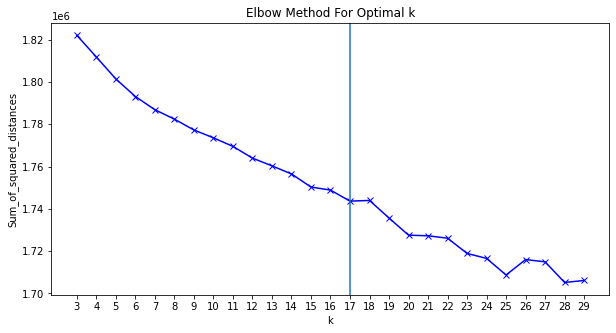

In [5]:
plt.figure(figsize=(10,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.xticks(K)
plt.axvline(kl.elbow)
plt.title('Elbow Method For Optimal k')
plt.show()

From the plot above and using the elbow method to determine the number of clusters , since we have a population data , and it seems reosonable that clusters of populations should be more than 5 , so we would go for 17 because it's the most appropiate value according to the elbow method

In [4]:
k=17
km=KMeans(n_clusters=k)
km=km.fit(azdias)

In [5]:
pk.dump(km,open("kmean.pkl","wb")) #saving the kmeans object for later use on the remaining sets

In [6]:
km=pk.load(open("kmean.pkl","rb"))

In [7]:
azdias_clusters=km.predict(azdias)

In [8]:
azdias['Cluster']=azdias_clusters

In [9]:
azdias_clusters=azdias.Cluster.value_counts()

In [10]:
azdias_clusters.name="Azdias"

Now we will cluster our customers data set 

In [11]:
customers=pd.read_csv("customers_pca.csv")

In [12]:
customers['Cluster']=km.predict(customers)

In [13]:
set(azdias.columns).difference(set(customers.columns))

set()

In [14]:
customer_clusters=customers.Cluster.value_counts()
customer_clusters.name="Customers"

In [15]:
clusters_azd_cust=pd.concat([azdias_clusters,customer_clusters],axis=1)

In [16]:
clusters_azd_cust.reset_index(inplace=True)
clusters_azd_cust.rename(columns={"index":"cluster"},inplace=True)
clusters_azd_cust=clusters_azd_cust.melt(id_vars="cluster",var_name="Data",value_name="Cluster_Number")

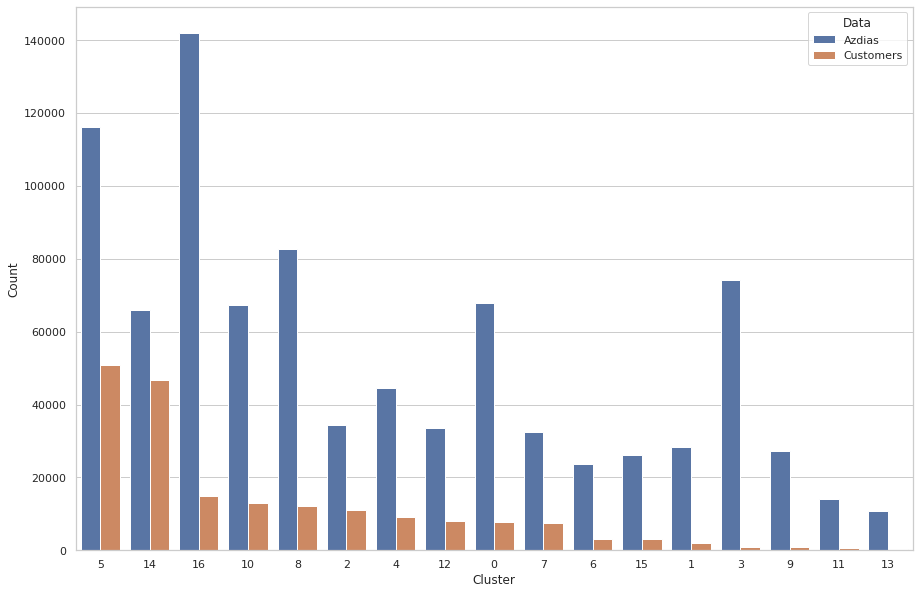

In [17]:
order=list(customer_clusters.index)
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid");
sns.barplot(data=clusters_azd_cust,x="cluster",y="Cluster_Number",hue="Data",order=order);
plt.xlabel("Cluster");
plt.ylabel("Count");

As we can see from the plot above that clusters 5,14 are very large among customers.

## Let's check those Cluster and what makes them up 

### Cluster 5

/home/shapiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shapiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


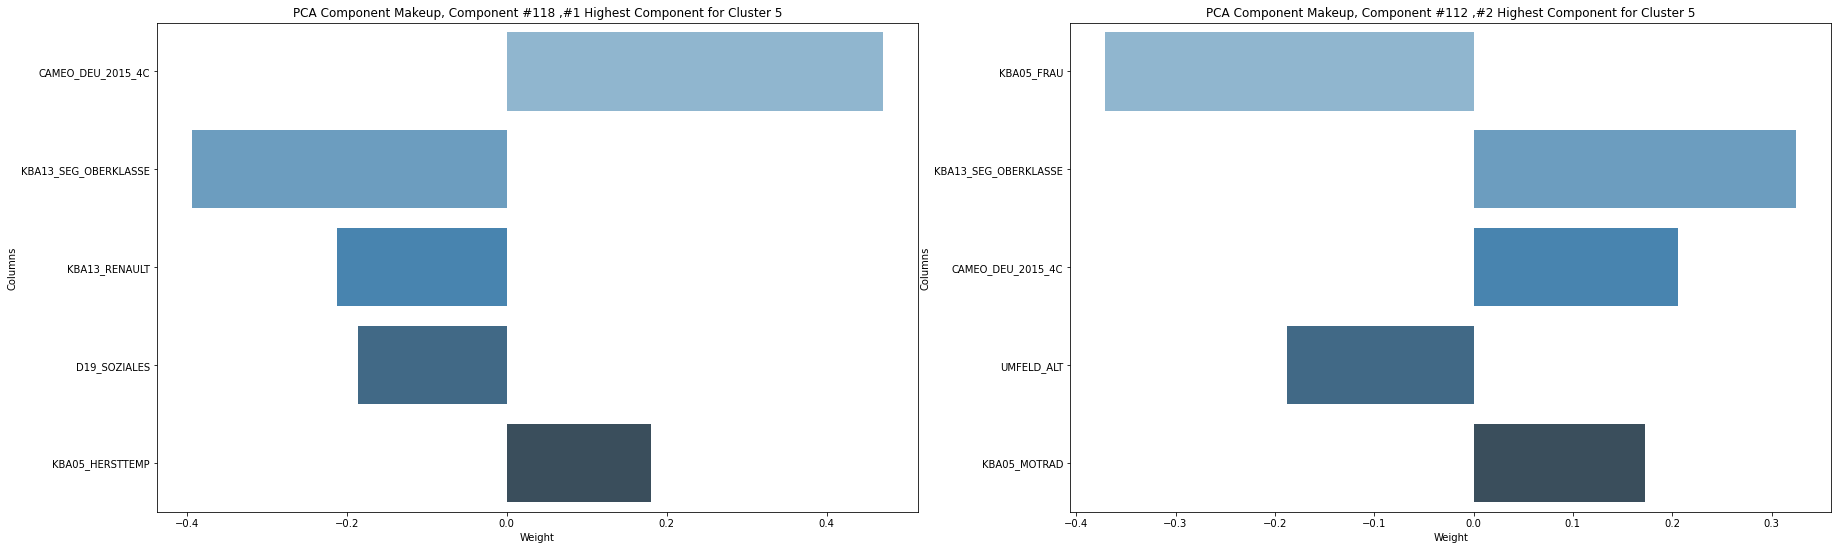

In [49]:
plot_cluster(5,top_cluster_comp=2,top_pca_comp=5,plot_num=1)

The CAMEO Classifications are a set of consumer classifications that are used internationally by organisations as part of their sales, marketing and network planning strategies.

### As we can see above that cluster 5 two highest centroids components are positivily high reliable on a 
- 1) 4C Category of `CAMEO_DEU_2015` which is : String Trimmer 

/home/shapiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/shapiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


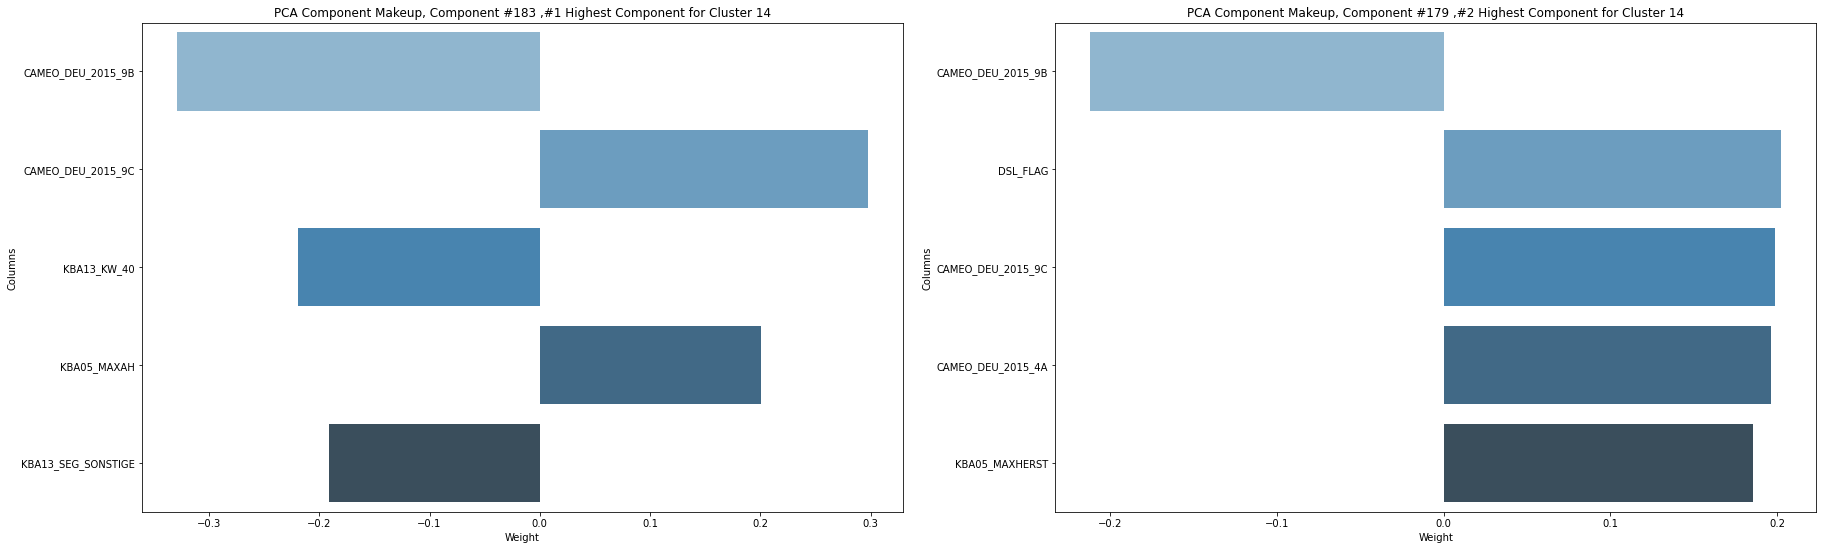

In [50]:
plot_cluster(14,top_cluster_comp=2,top_pca_comp=5,plot_num=1)

### As we can see above that cluster 5 two highest centroids components are positivily high reliable on a 
- 1) 9C Category of `CAMEO_DEU_2015` which is : Afternoon Talk Show
- 2) 4A Category of `CAMEO_DEU_2015` which is : Family Starter
### And negativly reliable on 
- 1) 9B Category of `CAMEO_DEU_2015` which is : Temporary Workers

## Now we can check our training data to build the supervised model that classify potential customers (restart kernel)

# Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 
import pickle as pk 
from tools import*
%matplotlib inline

# EDA

In [2]:
train=pd.read_csv("train_clean.csv")

In [3]:
transform_df(train)

There are 2 additional columns in the data set
Do you wish to continue ? (y/n) (aditional columns will remain the same in the resulting data_frame)y
Additional columns
Column LNR
NaNs = 0
Sample of values = [56980.  9107. 77434.  3974. 28138.]
Propotion  of NaNs = 0.0
Column RESPONSE
NaNs = 0
Sample of values = [0 0 0 0 0]
Propotion  of NaNs = 0.0
Enter the name of columns you wish to keep , separated by -> ex : col1,col2,col3 or 0 for none or allRESPONSE
Do you wish to save the new dataframe? (y/n)y
Name (without .csv) : train_pca


,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_225,c_226,c_227,c_228,c_229,c_230,c_231,c_232,c_233,RESPONSE
0,0.269856,0.272524,0.490466,0.723942,0.259444,0.427840,0.374020,0.361290,0.383219,0.534236,...,0.445265,0.437076,0.367775,0.492739,0.455018,0.406110,0.516446,0.321799,0.244474,0.0
1,0.701313,0.334885,0.414333,0.304379,0.224625,0.329431,0.268597,0.464946,0.490982,0.513411,...,0.552845,0.596569,0.371018,0.487511,0.249261,0.529723,0.411752,0.477524,0.359341,0.0
2,0.562293,0.234408,0.343299,0.525729,0.737702,0.774745,0.582654,0.536541,0.511542,0.492194,...,0.574626,0.526528,0.409319,0.501289,0.319850,0.291122,0.422725,0.319030,0.435960,0.0
3,0.498508,0.135410,0.794926,0.688413,0.252490,0.554579,0.514358,0.677409,0.639866,0.554327,...,0.420798,0.419115,0.280195,0.418037,0.480757,0.528114,0.566253,0.649190,0.314207,0.0
4,0.440305,0.259639,0.570084,0.648140,0.699453,0.707482,0.454409,0.482531,0.358199,0.313118,...,0.270063,0.602031,0.395339,0.539929,0.461432,0.410522,0.599784,0.409209,0.320746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42957,0.789154,0.374864,0.629471,0.623231,0.694858,0.445157,0.582113,0.435935,0.549938,0.583018,...,0.323063,0.444998,0.285550,0.567650,0.425269,0.373245,0.493498,0.472700,0.373695,0.0
42958,0.765098,0.448406,0.249079,0.328821,0.584768,0.666378,0.463020,0.399213,0.344378,0.511817,...,0.497880,0.493162,0.277660,0.448331,0.411219,0.380648,0.427588,0.388309,0.386605,0.0
42959,0.747907,0.243981,0.467343,0.342895,0.649441,0.488746,0.517459,0.610488,0.489242,0.472284,...,0.583575,0.536970,0.163395,0.640789,0.449113,0.271329,0.403340,0.500285,0.297441,0.0
42960,0.611259,0.591420,0.399136,0.611529,0.193797,0.264407,0.720337,0.553726,0.608093,0.401895,...,0.536128,0.448889,0.300712,0.437440,0.309793,0.455443,0.433031,0.344179,0.292549,0.0


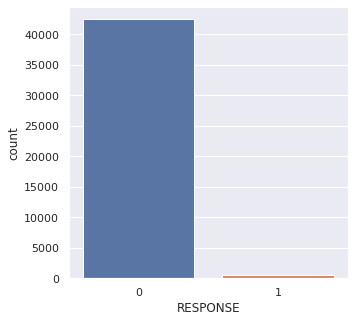

In [3]:
sns.set_theme(style="darkgrid");
plt.figure(figsize=(5,5));
sns.countplot(x=train.RESPONSE);

As we can see we have highly skewed training data set

In [4]:
train_clusered = prepare_training(split=False,scale_cluster=False)

In [5]:
train_counts=train_clusered.groupby('RESPONSE')['cluster'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('cluster')
train_counts.head()

,RESPONSE,cluster,percentage
25,1.0,0,5.075188
5,0.0,0,7.383926
27,1.0,1,2.067669
11,0.0,1,1.524864
8,0.0,2,4.591091


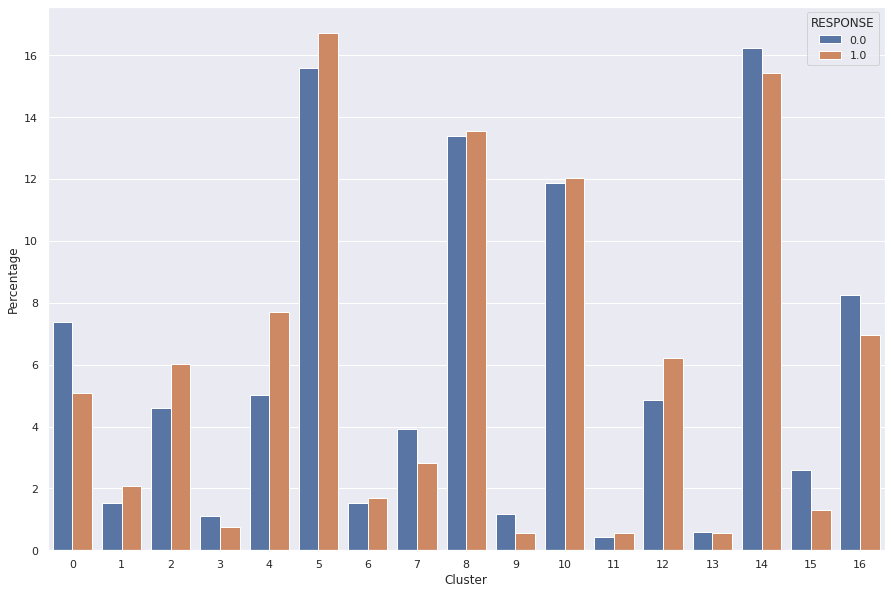

In [6]:
plt.figure(figsize=(15,10));
sns.barplot(data=train_counts,x="cluster",y="percentage",hue="RESPONSE");
plt.xlabel("Cluster");
plt.ylabel("Percentage");

We can see that clusters are consistent among the negative and postive examples.

###  Since the clustering and the prinicple component analysis isn't showing us a good seperation in the training set , we should go for the orginal data set without any further mutation as k-means or PCA

In [2]:
train=pd.read_csv("train_clean.csv")
train.head()

,KBA05_DIESEL,KBA05_SEG8,KBA05_ANTG1,ORTSGR_KLS9,KBA13_SEG_KLEINWAGEN,SEMIO_VERT,D19_SOZIALES,KBA13_SEG_KOMPAKTKLASSE,KBA13_VORB_1,KBA13_KRSSEG_OBER,...,KBA05_VORB1,KBA13_KMH_0_140,KBA13_SEG_MINIVANS,HH_EINKOMMEN_SCORE,KBA13_KRSHERST_BMW_BENZ,ANZ_KINDER,AGER_TYP,D19_BANKEN_ONLINE_QUOTE_12,KBA05_MOD8,RESPONSE
0,3.0,2.0,0.0,7.0,2.0,3.0,1.0,3.0,4.0,2.0,...,3.0,3.0,1.0,6.0,3.0,0.0,2.0,0.0,0.0,0
1,3.0,0.0,3.0,2.0,3.0,4.0,5.0,2.0,3.0,3.0,...,5.0,4.0,3.0,1.0,2.0,0.0,1.0,0.0,2.0,0
2,2.0,0.0,3.0,8.0,3.0,7.0,2.0,4.0,3.0,2.0,...,4.0,1.0,2.0,1.0,4.0,0.0,1.0,0.0,0.0,0
3,1.0,3.0,2.0,9.0,1.0,2.0,1.0,1.0,3.0,3.0,...,2.0,5.0,2.0,4.0,5.0,0.0,2.0,0.0,0.0,0
4,2.0,1.0,1.0,7.0,2.0,7.0,1.0,4.0,1.0,2.0,...,3.0,1.0,3.0,4.0,3.0,0.0,2.0,0.0,1.0,0


In [3]:
transform_df(df=train,pca_=False,scale__=False)

There are 2 additional columns in the data set


Do you wish to continue ? (y/n) (aditional columns will remain the same in the resulting data_frame) y


Additional columns
Column RESPONSE
NaNs = 0
Sample of values = [0 0 0 0 0]
Propotion  of NaNs = 0.0
Column LNR
NaNs = 0
Sample of values = [52371. 61394. 24447. 56272. 77360.]
Propotion  of NaNs = 0.0


Enter the name of columns you wish to keep , separated by -> ex : col1,col2,col3 or 0 for none or all RESPONSE
Do you wish to save the new dataframe? (y/n) y
Name (without .csv) :  train_wo_pca


,D19_DIGIT_SERV,KBA13_HALTER_60,KBA13_SEG_GELAENDEWAGEN,D19_GESAMT_OFFLINE_DATUM,KBA13_KRSAQUOT,KBA13_GBZ,KBA05_KRSHERST2,WOHNDAUER_2008,D19_KONSUMTYP,KBA05_ANTG4,...,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,RESPONSE
0,0.0,1.0,3.0,9.0,2.0,2.0,2.0,9.0,3.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,3.0,3.0,1.0,4.0,4.0,4.0,9.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,1.0,2.0,6.0,3.0,4.0,3.0,9.0,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,2.0,4.0,10.0,4.0,4.0,3.0,9.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,2.0,3.0,7.0,3.0,2.0,4.0,9.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42957,0.0,1.0,3.0,4.0,4.0,4.0,4.0,8.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
42958,0.0,3.0,2.0,5.0,3.0,3.0,3.0,9.0,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
42959,0.0,3.0,5.0,9.0,3.0,5.0,3.0,9.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
42960,0.0,1.0,5.0,9.0,2.0,3.0,3.0,9.0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,0


## We will try the base models without any training for the following alogrithims , and then decide the most accurate two according to our defined metrices and then tune them. 
- XGBoost
- CatBoost 
- LGBM Classifier 
- Neural Network by AutoKeras

In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, BorderlineSMOTE , RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate , RepeatedStratifiedKFold
from statistics import mean,stdev
from collections import Counter
from tools import*
from cuml.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from cuml.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score

In [11]:
model_df=pd.DataFrame(data=np.zeros(shape=(4,8))
                      ,columns=['train_f1','train_f1_sd','train_roc_auc'
                                ,'train_roc_auc_sd','test_f1','test_f1_sd',
                                'test_roc_auc','test_roc_auc_sd'],
                     index=['RandomForest','XGB','CatBoost','LGBM'])
model_df

,train_f1,train_f1_sd,train_roc_auc,train_roc_auc_sd,test_f1,test_f1_sd,test_roc_auc,test_roc_auc_sd
RandomForest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XGB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CatBoost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LGBM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
classifiers=[RandomForestClassifier(),XGBClassifier(),CatBoostClassifier(),LGBMClassifier()]
clf_names=list(model_df.index)

In [13]:
X,y = prepare_training(pca_=False,k_means=False,return_x_y=True,split=False)

In [14]:
s=('f1','roc_auc')
skipped=[]
for model,name in zip(classifiers,clf_names):
    

    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    try:
        
        scores=cross_validate(model,X,y,scoring=s,cv=cv,return_train_score=True)
        
    except:
        
        skipped.append(name)
        continue
        
    model_df.loc[name,'train_f1']=mean(scores['train_f1'])
    model_df.loc[name,'train_f1_sd']=stdev(scores['train_f1'])
    model_df.loc[name,'train_roc_auc']=mean(scores['train_roc_auc'])
    model_df.loc[name,'train_roc_auc_sd']=stdev(scores['train_roc_auc'])
    model_df.loc[name,'test_f1']=mean(scores['test_f1'])
    model_df.loc[name,'test_f1_sd']=stdev(scores['test_f1'])
    model_df.loc[name,'test_roc_auc']=mean(scores['test_roc_auc'])
    model_df.loc[name,'test_roc_auc_sd']=stdev(scores['test_roc_auc'])
    
    print("Finished {}".format(name))


model_df

/home/shapiro/anaconda3/lib/python3.7/site-packages/cuml/common/memory_utils.py:56: UserWarning: To use pickling or GPU-based prediction first train using float32 data to fit the estimator
  return func(*args, **kwargs)


Finished XGB
Learning rate set to 0.049059
0:	learn: 0.5937138	total: 78.9ms	remaining: 1m 18s
1:	learn: 0.5096417	total: 93.3ms	remaining: 46.6s
2:	learn: 0.4392198	total: 105ms	remaining: 35s
3:	learn: 0.3799747	total: 119ms	remaining: 29.5s
4:	learn: 0.3310312	total: 135ms	remaining: 26.8s
5:	learn: 0.2900362	total: 147ms	remaining: 24.4s
6:	learn: 0.2558760	total: 158ms	remaining: 22.4s
7:	learn: 0.2273321	total: 176ms	remaining: 21.8s
8:	learn: 0.2033880	total: 188ms	remaining: 20.7s
9:	learn: 0.1831940	total: 201ms	remaining: 19.9s
10:	learn: 0.1663278	total: 214ms	remaining: 19.3s
11:	learn: 0.1520419	total: 227ms	remaining: 18.7s
12:	learn: 0.1400579	total: 238ms	remaining: 18.1s
13:	learn: 0.1297457	total: 251ms	remaining: 17.6s
14:	learn: 0.1210589	total: 267ms	remaining: 17.5s
15:	learn: 0.1137395	total: 283ms	remaining: 17.4s
16:	learn: 0.1074336	total: 294ms	remaining: 17s
17:	learn: 0.1013808	total: 307ms	remaining: 16.7s
18:	learn: 0.0967623	total: 321ms	remaining: 16.6s

,train_f1,train_f1_sd,train_roc_auc,train_roc_auc_sd,test_f1,test_f1_sd,test_roc_auc,test_roc_auc_sd
RandomForest,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
XGB,0.915830,0.003853,0.990887,0.000433,0.0,0.0,0.685591,0.025834
CatBoost,0.467060,0.024143,0.972294,0.001118,0.0,0.0,0.756779,0.026508
LGBM,0.884861,0.007659,0.984920,0.000454,0.0,0.0,0.711730,0.027749


In [15]:
model_df

,train_f1,train_f1_sd,train_roc_auc,train_roc_auc_sd,test_f1,test_f1_sd,test_roc_auc,test_roc_auc_sd
RandomForest,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
XGB,0.915830,0.003853,0.990887,0.000433,0.0,0.0,0.685591,0.025834
CatBoost,0.467060,0.024143,0.972294,0.001118,0.0,0.0,0.756779,0.026508
LGBM,0.884861,0.007659,0.984920,0.000454,0.0,0.0,0.711730,0.027749


As we can see above the best two models are Catboost and LGBM , so we may consider trying two methods to imporve them before any hyperparamter tunning. 
- Specifying Class weight due to data skewness 
- Trying RandomOver Sampling the minority class 

### Class Weights

In [16]:
weight=Counter(y)[0]/Counter(y)[1]
weight

79.75563909774436

In [18]:
s=('f1','roc_auc')
model=CatBoostClassifier(class_weights={0:1,1:weight},verbose=False)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
catboost_scores=cross_validate(model,X,y,scoring=s,cv=cv,return_train_score=True)
print("Mean test ROC using Catboost = {}".format(mean(catboost_scores['test_roc_auc'])))
print("Mean test F1 using Catboost = {}".format(mean(catboost_scores['test_f1'])))

Mean test ROC using Catboost = 0.6659822931388233
Mean test F1 using Catboost = 0.024333770166272257


We can see from above that using class weight didn't Decreased the ROC but slightly improved the f1 score for the Catboost classifier

In [21]:
%%time
s=('f1','roc_auc')
model=LGBMClassifier(class_weight={0:1,1:weight})
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
lgbm_scores=cross_validate(model,X,y,scoring=s,cv=cv,return_train_score=True)
print("Mean test ROC using LGBM = {}".format(mean(lgbm_scores['test_roc_auc'])))
print("Mean test F1 using LGBM = {}".format(mean(lgbm_scores['test_f1'])))

Mean test ROC using LGBM = 0.6864597306897389
Mean test F1 using LGBM = 0.04856857840911746
CPU times: user 11min 28s, sys: 10.9 s, total: 11min 39s
Wall time: 1min 10s


We can see from above that using class weight didn't Decreased the ROC but slightly improved the f1 score for the LGBM classifier

### RandomOver Sampling 

Since Catboost is our preformer algorithim , we will use it to specify the best sampling strategies

PS : We didn't consider any type of SMOT over sampling because our dataset is high dimensional, and according to my previous expriences SMOT isn't good for high dimensional data sets

In [22]:
%%time
dicts_lists=[]
dictionary_random={'over':0,'under':0,"roc":0}
maximum=0


for over_i in np.arange(0.1,1,0.1):
        
    for under_j in np.arange(over_i,1,0.1):
            
        model= CatBoostClassifier(task_type="GPU",verbose=False)
        over=  RandomOverSampler(sampling_strategy=over_i)
        under= RandomUnderSampler(sampling_strategy=under_j)
        X_train,X_test,y_train,y_test=over_sample_train(over_estimator=over,under_estimator=under)
        model.fit(X_train,y_train)
        y_pred=model.predict_proba(X_test)[:,-1]
        eval_mat=roc_auc_score(y_true=y_test,y_score=y_pred)
        if eval_mat > maximum: 
            maximum=eval_mat
            dictionary_random['roc']=maximum
            dictionary_random['over']=over_i
            dictionary_random['under']=under_j
            dicts_lists.append(dictionary_random)

print(dictionary_random)

{'over': 0.2, 'under': 0.30000000000000004, 'roc': 0.6193001060445387}
CPU times: user 40min 38s, sys: 2min 37s, total: 43min 15s
Wall time: 32min 59s


Compared to the base Catboost model of ROC aprox. equal to 0.76 , over sampling decreased the roc alot, so we won't use it. 

## NeuralNetwork Using AutoKeras

In [13]:
import autokeras as ak
import keras as k 
import kerastuner as kt 

Since Autokeras Structured Classifier has the feature selection layers inside of it and specifying categorical columns , we will use version of training dataset not one hot encoded

In [6]:
transform_df(train,one_hot=False,pca_=False,scale__=False)

There are 2 additional columns in the data set


Do you wish to continue ? (y/n) (aditional columns will remain the same in the resulting data_frame) y


Additional columns
Column LNR
NaNs = 0
Sample of values = [16553. 74114. 72392. 15193. 63743.]
Propotion  of NaNs = 0.0
Column RESPONSE
NaNs = 0
Sample of values = [0 0 0 0 0]
Propotion  of NaNs = 0.0


Enter the name of columns you wish to keep , separated by -> ex : col1,col2,col3 or 0 for none or all RESPONSE
Do you wish to save the new dataframe? (y/n) y
Name (without .csv) :  train_wo_pca_wo_onehot


,D19_DIGIT_SERV,KBA13_HALTER_60,KBA13_SEG_GELAENDEWAGEN,D19_GESAMT_OFFLINE_DATUM,KBA13_KRSAQUOT,KBA13_GBZ,KBA05_KRSHERST2,WOHNDAUER_2008,D19_KONSUMTYP,KBA05_ANTG4,...,D19_KOSMETIK,KBA05_ANTG2,VERDICHTUNGSRAUM,KBA13_KW_60,KBA13_KW_30,KBA05_MAXBJ,D19_BANKEN_ONLINE_QUOTE_12,CAMEO_DEU_2015,OST_WEST_KZ,RESPONSE
0,0.0,1.0,3.0,9.0,2.0,2.0,2.0,9.0,3.0,2.0,...,7.0,0.0,4.0,2.0,3.0,3.0,0.0,5D,W,0
1,0.0,3.0,3.0,1.0,4.0,4.0,4.0,9.0,1.0,0.0,...,6.0,0.0,0.0,0.0,3.0,1.0,0.0,5B,W,0
2,0.0,1.0,2.0,6.0,3.0,4.0,3.0,9.0,2.0,0.0,...,0.0,0.0,10.0,3.0,1.0,4.0,0.0,2D,O,0
3,0.0,2.0,4.0,10.0,4.0,4.0,3.0,9.0,3.0,0.0,...,7.0,3.0,5.0,1.0,1.0,4.0,0.0,2D,W,0
4,0.0,2.0,3.0,7.0,3.0,2.0,4.0,9.0,2.0,1.0,...,0.0,0.0,4.0,2.0,1.0,4.0,0.0,7B,W,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42957,0.0,1.0,3.0,4.0,4.0,4.0,4.0,8.0,1.0,0.0,...,0.0,3.0,4.0,1.0,1.0,4.0,0.0,3C,W,0
42958,0.0,3.0,2.0,5.0,3.0,3.0,3.0,9.0,2.0,0.0,...,0.0,1.0,0.0,5.0,1.0,2.0,0.0,6B,O,0
42959,0.0,3.0,5.0,9.0,3.0,5.0,3.0,9.0,2.0,0.0,...,6.0,2.0,0.0,3.0,1.0,4.0,0.0,4A,W,0
42960,0.0,1.0,5.0,9.0,2.0,3.0,3.0,9.0,4.0,0.0,...,0.0,2.0,0.0,3.0,1.0,4.0,0.0,8A,W,0


Categorical and numerical columns should be specified for the Classifier first

In [35]:
categorical_cols=load_list("cat1")
categorical_cols.remove("LNR")
numerical_cols=load_list("num1")

In [36]:
columns=list(set(categorical_cols).union(set(numerical_cols)))
len(columns)

355

In [37]:
column_types={}
for cat in categorical_cols:
    column_types[cat]='categorical'
for numer in numerical_cols:
    column_types[numer]='numerical'

In [42]:
ak_class=ak.StructuredDataClassifier(column_names=columns,
                                     column_types=column_types,
                                     loss=k.losses.binary_crossentropy,
                                     metrics=['AUC'],
                                     objective=kt.Objective('val_auc','max'),
                                     overwrite=True,
                                     project_name="Cat1")

In [16]:
X_train,X_test,y_train,y_test=prepare_training(pca_=False,k_means=False,return_frame=True,one_hot=False)

In [18]:
X_test

,D19_DIGIT_SERV,KBA13_HALTER_60,KBA13_SEG_GELAENDEWAGEN,D19_GESAMT_OFFLINE_DATUM,KBA13_KRSAQUOT,KBA13_GBZ,KBA05_KRSHERST2,WOHNDAUER_2008,D19_KONSUMTYP,KBA05_ANTG4,...,SEMIO_KRIT,D19_KOSMETIK,KBA05_ANTG2,VERDICHTUNGSRAUM,KBA13_KW_60,KBA13_KW_30,KBA05_MAXBJ,D19_BANKEN_ONLINE_QUOTE_12,CAMEO_DEU_2015,OST_WEST_KZ
11819,0.0,2.0,2.0,9.0,4.0,4.0,4.0,9.0,4.0,1.0,...,4.0,0.0,0.0,4.0,0.0,1.0,3.0,0.0,5D,W
26321,0.0,5.0,2.0,10.0,2.0,3.0,2.0,9.0,9.0,1.0,...,7.0,0.0,0.0,15.0,3.0,1.0,1.0,0.0,9D,W
40847,0.0,3.0,5.0,1.0,3.0,5.0,3.0,9.0,1.0,0.0,...,3.0,6.0,2.0,0.0,4.0,2.0,2.0,0.0,4C,W
4414,0.0,3.0,3.0,10.0,3.0,3.0,3.0,9.0,7.0,0.0,...,7.0,0.0,1.0,6.0,2.0,1.0,2.0,-0.0,4E,W
9149,0.0,3.0,3.0,8.0,3.0,4.0,3.0,9.0,1.0,0.0,...,6.0,0.0,1.0,0.0,3.0,1.0,4.0,0.0,4C,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36954,0.0,3.0,3.0,1.0,2.0,3.0,1.0,9.0,1.0,0.0,...,4.0,6.0,2.0,0.0,4.0,1.0,3.0,0.0,5C,W
8667,0.0,3.0,1.0,9.0,3.0,3.0,3.0,9.0,3.0,0.0,...,6.0,0.0,2.0,1.0,4.0,1.0,2.0,0.0,9D,W
10301,0.0,3.0,2.0,9.0,2.0,3.0,3.0,9.0,3.0,0.0,...,6.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0,6B,W
1465,0.0,3.0,2.0,6.0,3.0,3.0,3.0,6.0,1.0,0.0,...,5.0,7.0,3.0,0.0,3.0,1.0,3.0,0.0,6B,W


In [19]:
X_train

,D19_DIGIT_SERV,KBA13_HALTER_60,KBA13_SEG_GELAENDEWAGEN,D19_GESAMT_OFFLINE_DATUM,KBA13_KRSAQUOT,KBA13_GBZ,KBA05_KRSHERST2,WOHNDAUER_2008,D19_KONSUMTYP,KBA05_ANTG4,...,SEMIO_KRIT,D19_KOSMETIK,KBA05_ANTG2,VERDICHTUNGSRAUM,KBA13_KW_60,KBA13_KW_30,KBA05_MAXBJ,D19_BANKEN_ONLINE_QUOTE_12,CAMEO_DEU_2015,OST_WEST_KZ
33581,0.0,4.0,3.0,8.0,3.0,4.0,3.0,9.0,1.0,0.0,...,3.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0,6B,W
14947,0.0,1.0,1.0,9.0,2.0,3.0,5.0,9.0,3.0,0.0,...,6.0,0.0,3.0,1.0,3.0,2.0,4.0,0.0,6F,W
41573,0.0,3.0,3.0,5.0,3.0,3.0,4.0,8.0,6.0,0.0,...,3.0,6.0,2.0,0.0,2.0,1.0,4.0,0.0,1A,W
27282,0.0,3.0,4.0,9.0,1.0,4.0,5.0,9.0,2.0,0.0,...,3.0,6.0,0.0,0.0,3.0,1.0,1.0,0.0,3C,W
27482,0.0,3.0,3.0,10.0,3.0,3.0,3.0,9.0,7.0,0.0,...,7.0,0.0,1.0,7.0,2.0,1.0,2.0,-0.0,4E,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,0.0,3.0,3.0,10.0,2.0,4.0,1.0,9.0,4.0,1.0,...,3.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,6C,W
37624,0.0,3.0,2.0,9.0,1.0,4.0,2.0,9.0,2.0,0.0,...,3.0,7.0,1.0,0.0,2.0,2.0,4.0,0.0,3C,W
10355,0.0,3.0,3.0,10.0,3.0,5.0,3.0,9.0,2.0,0.0,...,3.0,0.0,3.0,39.0,0.0,3.0,2.0,0.0,2D,W
35539,0.0,2.0,3.0,2.0,2.0,4.0,3.0,9.0,1.0,0.0,...,5.0,6.0,1.0,2.0,2.0,3.0,1.0,0.0,1D,O


In [22]:
Counter(y_train)[0]/Counter(y_train)[1] , Counter(y_test)[0]/Counter(y_test)[1]

(79.67840375586854, 80.06603773584905)

In [43]:
ak_class.fit(X_train,y=y_train,
            epochs=1000,
            validation_data=(X_test,y_test))

Trial 33 Complete [00h 14m 41s]
val_auc: 0.566142201423645

Best val_auc So Far: 0.7443943619728088
Total elapsed time: 05h 25m 33s

Search: Running Trial #34

Hyperparameter    |Value             |Best Value So Far 
structured_data...|False             |False             
structured_data...|3                 |1                 
structured_data...|False             |False             
structured_data...|0.5               |0                 
structured_data...|64                |32                
structured_data...|512               |32                
classification_...|0.25              |0.25              
optimizer         |adam              |adam              
learning_rate     |0.001             |0.001             
structured_data...|1024              |None              

Epoch 1/1000
1075/1075 [==============================] - 13s 12ms/step - loss: 0.2194 - auc: 0.4811 - val_loss: 0.0676 - val_auc: 0.5539
Epoch 2/1000
1075/1075 [==============================] - 12s 11ms/step - 

KeyboardInterrupt: 

We stopped training because the best value the model reached was 74% of AUC under ROC curve. 

==============================================================================================================

## After Testing All possible classifiers with multiple approaches we now can tune CATBOOST

In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn as sk 
import pickle as pk 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tools import*
from sklearn.metrics import roc_auc_score
import skopt
from skopt import BayesSearchCV
import lightgbm as lgb
class BayesSearchCV(BayesSearchCV):
    def _run_search(self, x): raise BaseException('Use newer skopt')
train=pd.read_csv("train_clean.csv",sep=";")

## Tunning LGBM 

In [6]:
X,y = prepare_training(pca_=False,k_means=False,split=False,return_x_y=True)

In [76]:
Counter(y)

Counter({0: 42430, 1: 532})

In [93]:
ITERATIONS = 100
bayes_cv_tuner_lgbm = BayesSearchCV(
    estimator = lgb.LGBMClassifier(
        application='binary',
        metric='auc',
        verbose=-1,
        force_col_wise=True,
    ),
    search_spaces = {
        'learning_rate': (0.001, 0.3, 'uniform'),
        'num_leaves': (2, 225),      
        'max_depth': (10, 100),
        'colsample_bytree':(0.5, 1.0, 'uniform'),
        'min_child_samples': (0, 50),
        'max_bin': (100, 1000),
        'reg_lambda': (1e-9, 1.0, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': (1,90, 'uniform'),
        'n_estimators': (20, 400),
},    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
    ),
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner_lgbm.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner_lgbm.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner_lgbm.best_score_, 4),
        bayes_cv_tuner_lgbm.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner_lgbm.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [94]:
%%time
result_lgbm = bayes_cv_tuner_lgbm.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.5769
Best params: OrderedDict([('colsample_bytree', 0.5096165178788888), ('learning_rate', 0.23789521358002388), ('max_bin', 845), ('max_depth', 12), ('min_child_samples', 9), ('n_estimators', 265), ('num_leaves', 130), ('reg_alpha', 3.708170687464179e-08), ('reg_lambda', 0.692101071793424), ('scale_pos_weight', 38)])

Model #2
Best ROC-AUC: 0.6042
Best params: OrderedDict([('colsample_bytree', 0.9057325683724082), ('learning_rate', 0.07886400158861902), ('max_bin', 252), ('max_depth', 42), ('min_child_samples', 29), ('n_estimators', 300), ('num_leaves', 115), ('reg_alpha', 2.982415852417744e-08), ('reg_lambda', 3.2159241424917236e-09), ('scale_pos_weight', 21)])

Model #3
Best ROC-AUC: 0.6042
Best params: OrderedDict([('colsample_bytree', 0.9057325683724082), ('learning_rate', 0.07886400158861902), ('max_bin', 252), ('max_depth', 42), ('min_child_samples', 29), ('n_estimators', 300), ('num_leaves', 115), ('reg_alpha', 2.982415852417744e-08), ('reg_lambda', 3.2

We can see LBGM improved from 71 to 77 

### Tunning Catboost

In [18]:
catboost_search={'iterations': (10, 300),
                 'depth': (1, 16),
                 'learning_rate': (0.001, 1.0, 'log-uniform'),
                 'random_strength': (1, 10, 'log-uniform'),
                 'bagging_temperature': (0.01, 1.0),
                 'border_count': (1, 255),
                 'l2_leaf_reg': (2, 30),
                 'scale_pos_weight':(1, 90, 'uniform')}

In [19]:
ITERATIONS = 200
SEED= 28
bayes_cv_tuner_cb = BayesSearchCV(
    estimator = CatBoostClassifier(verbose=0,
                                   task_type="GPU"
        
  
    ),
    search_spaces = catboost_search,
    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state= SEED
    ),
    n_iter = ITERATIONS,   
    refit = True,
    random_state = np.random.RandomState(50)
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format },
    all_models = pd.DataFrame(bayes_cv_tuner_cb.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner_cb.best_params_)
    
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner_cb.best_score_, 4),
        bayes_cv_tuner_cb.best_params_
    ))
    # Save all model results
    clf_name = bayes_cv_tuner_cb.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [20]:
%%time
result_catboost = bayes_cv_tuner_cb.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.7202
Best params: OrderedDict([('bagging_temperature', 0.8623796602754492), ('border_count', 116), ('depth', 9), ('iterations', 270), ('l2_leaf_reg', 3), ('learning_rate', 0.018861079534267168), ('random_strength', 8), ('scale_pos_weight', 35)])

Model #2
Best ROC-AUC: 0.7202
Best params: OrderedDict([('bagging_temperature', 0.8623796602754492), ('border_count', 116), ('depth', 9), ('iterations', 270), ('l2_leaf_reg', 3), ('learning_rate', 0.018861079534267168), ('random_strength', 8), ('scale_pos_weight', 35)])

Model #3
Best ROC-AUC: 0.7202
Best params: OrderedDict([('bagging_temperature', 0.8623796602754492), ('border_count', 116), ('depth', 9), ('iterations', 270), ('l2_leaf_reg', 3), ('learning_rate', 0.018861079534267168), ('random_strength', 8), ('scale_pos_weight', 35)])

Model #4
Best ROC-AUC: 0.7202
Best params: OrderedDict([('bagging_temperature', 0.8623796602754492), ('border_count', 116), ('depth', 9), ('iterations', 270), ('l2_leaf_reg', 3), ('lea

# Predecting

In [16]:
test=pd.read_csv("test_clean.csv")
test

,KBA05_DIESEL,KBA05_SEG8,KBA05_ANTG1,ORTSGR_KLS9,KBA13_SEG_KLEINWAGEN,SEMIO_VERT,D19_SOZIALES,KBA13_SEG_KOMPAKTKLASSE,KBA13_VORB_1,KBA13_KRSSEG_OBER,...,KBA13_KW_61_120,KBA05_VORB1,KBA13_KMH_0_140,KBA13_SEG_MINIVANS,HH_EINKOMMEN_SCORE,KBA13_KRSHERST_BMW_BENZ,ANZ_KINDER,AGER_TYP,D19_BANKEN_ONLINE_QUOTE_12,KBA05_MOD8
0,2.0,3.0,3.0,4.0,3.0,7.0,1.0,3.0,4.0,2.0,...,4.0,3.0,1.0,2.0,4.0,5.0,0.0,2.0,0.0,1.0
1,2.0,1.0,0.0,5.0,1.0,6.0,1.0,3.0,2.0,2.0,...,4.0,4.0,4.0,3.0,5.0,4.0,0.0,2.0,0.0,0.0
2,3.0,0.0,1.0,6.0,2.0,3.0,0.0,3.0,3.0,2.0,...,2.0,2.0,3.0,3.0,5.0,4.0,0.0,2.0,0.0,3.0
3,1.0,0.0,4.0,8.0,4.0,2.0,0.0,4.0,2.0,3.0,...,3.0,3.0,3.0,2.0,3.0,4.0,0.0,1.0,0.0,2.0
4,4.0,1.0,3.0,3.0,2.0,3.0,0.0,2.0,4.0,2.0,...,2.0,3.0,1.0,3.0,4.0,4.0,0.0,1.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,2.0,0.0,2.0,5.0,3.0,1.0,2.0,3.0,3.0,2.0,...,3.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,-0.0,1.0
42829,3.0,0.0,4.0,4.0,3.0,6.0,3.0,2.0,3.0,2.0,...,4.0,4.0,1.0,2.0,4.0,5.0,0.0,0.0,0.0,2.0
42830,2.0,1.0,4.0,4.0,3.0,5.0,1.0,2.0,3.0,3.0,...,3.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0,0.0,1.0
42831,2.0,0.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,1.0,...,1.0,3.0,5.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0


In [17]:
test=transform_df(df=test,pca_=False,scale__=False)

There are 1 additional columns in the data set


Do you wish to continue ? (y/n) (aditional columns will remain the same in the resulting data_frame) y


Additional columns
Column LNR
NaNs = 0
Sample of values = [69429. 44285. 36044. 79245. 70095.]
Propotion  of NaNs = 0.0


Enter the name of columns you wish to keep , separated by -> ex : col1,col2,col3 or 0 for none or all LNR
Do you wish to save the new dataframe? (y/n) n


In [19]:
LNR=test.LNR.values.astype(int)
test.drop(columns="LNR",inplace=True)

In [20]:
classifier=CatBoostClassifier(bagging_temperature=1.0,
                              border_count=3,
                              depth=12,
                              iterations=123,
                              l2_leaf_reg=30,
                              learning_rate=0.001,
                              random_strength=5,
                              scale_pos_weight=50,
                              verbose=0
)

X,y = prepare_training(pca_=False,k_means=False,split=False,return_x_y=True)

classifier.fit(X,y)

In [21]:
RESPONSE=classifier.predict_proba(test)[:,-1]

In [24]:
submission = pd.DataFrame(data=np.zeros((test.shape[0],2)),columns=['LNR',"RESPONSE"])

In [26]:
submission.loc[:,"LNR"]=LNR
submission.loc[:,"RESPONSE"]=RESPONSE
submission

,LNR,RESPONSE
0,1754,0.494727
1,1770,0.486695
2,1465,0.473452
3,1470,0.468518
4,1478,0.479042
...,...,...
42828,67615,0.484801
42829,67938,0.468557
42830,67942,0.482914
42831,67949,0.477471


In [27]:
submission.to_csv("submission.csv",index=False)

In [221]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [222]:
def plot_cluster(cluster_num,top_cluster_comp=10,top_pca_comp=10,plot_num=0):
    '''
    Function for plotting cluster top components 
    cluster_num = cluster number ranges from 1 to 17 
    top_cluster_comp = top highest centroids in the cluster 1 to 233
    top_pca_comp = top PCA component for each cluster centroid 1 to 399
    component
    '''
    import pickle as pk
    pca_obj=load_pca_object()
    kmeans_obj=pk.load(open("kmean.pkl","rb"))
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    centroid_df=pd.DataFrame(data=kmeans_obj.cluster_centers_,columns=["Comp_{}".format(x) for x in range(1,234)],index=range(1,18))
    cluster_top_comps=[int(x)-1 for x in centroid_df.loc[cluster_num,:].sort_values(ascending=False)[:top_cluster_comp].index.str.split("_").str[1]]
    col_names=load_list("azdias_cols")
    pca_comp=pca_obj.components_
    weights_df=pd.DataFrame(data=pca_comp[cluster_top_comps],columns=col_names,index=cluster_top_comps)
    comp=cluster_top_comps[plot_num]
    df_slice=(weights_df.loc[comp,:]).reindex(weights_df.iloc[1,:].abs().sort_values(ascending=False).index).to_frame(name="Weight").reset_index().rename(columns={"index":"Columns"}).iloc[:top_pca_comp,:]
    plt.subplots(figsize=(10,6));
    ax=sns.barplot(data=df_slice,y="Columns",x="Weight",palette="Blues_d");
    ax.set_title("PCA Component Makeup, Component #{} ,#{} Highest Component for Cluster {}".format(comp+1,plot_num,cluster_num));

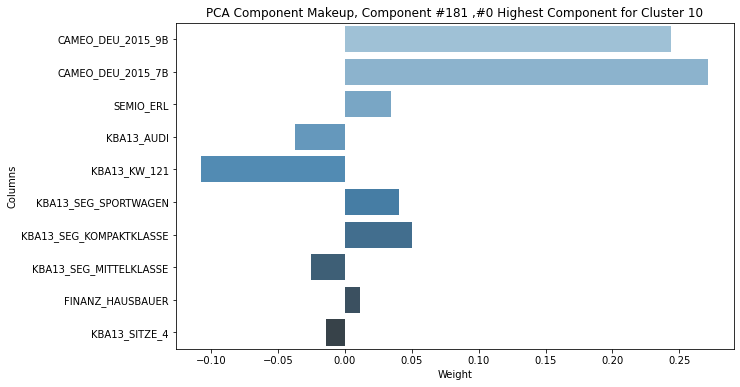

<function __main__.plot_cluster(cluster_num, top_cluster_comp=10, top_pca_comp=10, plot_num=0)>

In [227]:
interact(plot_cluster, cluster_num=10,top_cluster_comp=10,top_pca_comp=(10))